In [0]:
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.preprocessing import MinMaxScaler

# i_size = 5  # input vector size
# h_size = [20]  # number of neurons in hidden states
# o_size = 1  # output vector size
# h_count = len(h_size)

def bi_cross_entropy(d):
    y = Y[-1][0][0]
    return -d*np.log(y) - (1-d)*np.log(1-y)

def bi_cross_entropy_derivative(d):
    y = Y[-1][0][0]
    if d == 1:
        return [[-1 / y]]
    else:
        return [[1 / (1 - y)]]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    sig = 1 / (1 + np.exp(-z))
    return sig * (1 - sig)

def ReLU(z):
    return np.maximum(0.0,z)

def ReLU_derivative(z):
    if z > 0:
        return 1
    else:
        return 0

def jacobian(z,k):
    size = len(z)
    matrix = []
    for i in range(size):
        row = []
        for j in range(size):
            if i == j:
                if k == 1:
                    row.append(ReLU_derivative(z[i][0]))
                else:
                    row.append(sigmoid_derivative(z[i][0])) 
            else:
                row.append(0.0)
        matrix.append(row)

    return np.asarray(matrix)

def createWB():
    # initial initialization :P
    loss_W.clear()
    loss_W.append(None)
    loss_B.clear()
    loss_B.append(None)
    W.clear()
    W.append(None)
    B.clear()
    B.append(None)
    # Z.clear()
    # Z = [None] * (count)  # wy + b
    # Y.clear()
    # Y = [0] * (count)  # f(z)
    # initialize W matrix with some values
    h_prev_size = i_size
    for h_now_size in h_size + [o_size]:
        # weight matrix
        w = np.random.randn(h_now_size, h_prev_size)/np.sqrt(h_prev_size)
        W.append(w)
        w = np.zeros((h_prev_size, h_now_size))
        loss_W.append(w)
        # bias matrix
        b = np.random.randn(h_now_size, 1)
        B.append(b)
        b = np.zeros((1, h_now_size))
        loss_B.append(b)
        # update dimension
        h_prev_size = h_now_size

def forward(X):
    Y[0] = np.asarray(X)
    sigmoid_func = np.vectorize(sigmoid)
    ReLU_func = np.vectorize(ReLU)
    for k in range(1, count):
        Z[k] = np.dot(W[k], Y[k - 1]) + B[k]
        if k == 1:
            Y[k] = ReLU_func(Z[k])
        else:
            Y[k] = sigmoid_func(Z[k])  # activation function

def backward(d):
    div_y = np.asarray(bi_cross_entropy_derivative(d))
    for k in range(count - 1, 0, -1):
        Jyz = jacobian(Z[k],k)                
        # recurssion
        div_z = np.dot(div_y, Jyz)
        div_y = np.dot(div_z, W[k])
        # gradient computing
        div_w = np.dot(Y[k - 1], div_z)
        div_b = div_z
        # average computing
        loss_W[k] += div_w
        loss_B[k] += div_b

def update(data_count):
    for k in range(count - 1, 0, -1):
        W[k] = W[k] - float(eeta/data_count)*(loss_W[k].transpose())
        B[k] = B[k] - float(eeta/data_count)*(loss_B[k].transpose())

def clear():
    loss_W.clear()
    loss_W.append(None)
    loss_B.clear()
    loss_B.append(None)

    h_prev_size = i_size
    for h_now_size in h_size + [o_size]:
        w = np.zeros((h_prev_size, h_now_size))
        loss_W.append(w)
        b = np.zeros((1, h_now_size))
        loss_B.append(b)
        # update dimension
        h_prev_size = h_now_size

def test(ds):
    line_count = 0
    total_error = 0
    if ds == 'test':
        dataset = 'datatest.txt'
    else: 
        dataset = 'datatraining.txt'
    with open(dataset) as csv_test_file:
        next(csv_test_file)
        my_data = genfromtxt(csv_test_file, delimiter=',')
        csv_data = my_data[:,:]
        scaler = MinMaxScaler()
        norm_csv_data = scaler.fit_transform(my_data[:,2:7])
        for row in norm_csv_data:
            X = [[float(row[0])],[float(row[1])],[float(row[2])],[float(row[3])],[float(row[4])]]
            d = csv_data[line_count][-1]
            forward(X)
            error = bi_cross_entropy(d)
            total_error += error
            line_count += 1
    
    return total_error/line_count

def accuracy(ds):
    line_count = 0
    total_error = 0
    if ds == 'test':
        dataset = 'datatest.txt'
    else: 
        dataset = 'datatraining.txt'
    with open(dataset) as csv_test_file:
        next(csv_test_file)
        my_data = genfromtxt(csv_test_file, delimiter=',')
        csv_data = my_data[:,:]
        scaler = MinMaxScaler()
        norm_csv_data = scaler.fit_transform(my_data[:,2:7])
        for row in norm_csv_data:
            X = [[float(row[0])],[float(row[1])],[float(row[2])],[float(row[3])],[float(row[4])]]
            d = int(csv_data[line_count][-1])
            forward(X)
            y = Y[-1][0][0]
            if (d == 1) and (y > 0.5):
                total_error += 1
            elif (d == 0) and (y <= 0.5):
                total_error += 1
            line_count += 1
    return total_error/line_count

def find_c():
    line_count = 0
    count = 0
    with open('datatraining.txt') as csv_test_file:
        next(csv_test_file)
        my_data = genfromtxt(csv_test_file, delimiter=',')
        csv_data = my_data[:,:]
        for row in csv_data:
            count += row[-1]
            line_count += 1
    return count/line_count

def baseline(c):
    base_error = 0
    line_count = 0
    with open('datatraining.txt') as csv_test_file:
        next(csv_test_file)
        my_data = genfromtxt(csv_test_file, delimiter=',')
        csv_data = my_data[:,:]
        for row in csv_data:
            d = row[-1]
            base_error += -d*np.log(c) - (1-d)*np.log(1-c)
            line_count += 1

    return base_error/line_count

def train_test(batch_size,perf_type='error'):
    createWB() 
    test_error_list.clear()
    train_error_list.clear()
    for epoch in range(epoch_count):
        with open('datatraining.txt') as csv_train_file:
            next(csv_train_file)
            # to normalize data
            my_data = genfromtxt(csv_train_file, delimiter=',')
            csv_data = my_data[:,:]
            np.random.shuffle(csv_data)
            scaler = MinMaxScaler()
            norm_csv_data = scaler.fit_transform(my_data[:,2:7])
            line_count = 0
            for row in norm_csv_data[:batch_size]:
            # for row in norm_csv_data:
                X = [[float(row[0])],[float(row[1])],[float(row[2])],[float(row[3])],[float(row[4])]]
                d = csv_data[line_count][-1]
                forward(X)
                backward(d)
                line_count += 1
            update(line_count)
            clear()

            if perf_type == 'error':
                error = test('test')
            else:
                error = accuracy('test')
            test_error_list.append(error)
            
            if perf_type == 'error':
                error = test('train')
            else:
                error = accuracy('train')
            train_error_list.append(error)

            print(epoch,error) 

def plot(plot_baseline=True,plot_test=True,plot_train=True,perf_type='error'):
    # plot loss here
    c = find_c()
    y_baseline = baseline(c)        
    fig = plt.figure()
    # choosing which to plot
    if plot_baseline:
        plt.plot([0,epoch_count],[y_baseline,y_baseline],label='baseline')
    if plot_test:
        plt.plot(test_error_list,label='test')
    if plot_train:
        plt.plot(train_error_list,label='train')
    plt.xlabel('epoch')
    plt.ylabel(perf_type)   
    plt.legend()
    plt.show()


In [0]:
h_count = 1
count = h_count + 2
W = [None]  # weight matrix
B = [None]  # bias matrix
loss_W = [None]
loss_B = [None]
Z = [None] * (count)  # wy + b
Y = [0] * (count)  # f(z)
epoch_count = 100
test_error_list = []
train_error_list = []

1a) loss function used here is binary cross entropy loss

0 0.5338258572975609
1 0.5298371111435186
2 0.5265964644865507
3 0.5237138315019726
4 0.5210024284572256
5 0.5183884876257937
6 0.5158171817568945
7 0.5132502383024746
8 0.5106616407934592
9 0.5080103778833711
10 0.5052893002845232
11 0.5024860173516698
12 0.49958729350337994
13 0.49655521381437817
14 0.4933851053147953
15 0.4900345937388693
16 0.4865155216345288
17 0.48282251990289266
18 0.47896147798156097
19 0.4749153262589237
20 0.47068436240555145
21 0.46624858235710825
22 0.4615712427506149
23 0.45666422289684105
24 0.45151763689570995
25 0.44613019353434896
26 0.4404697250428669
27 0.4345590018478541
28 0.42847570688154746
29 0.4221971129724823
30 0.4157335718857822
31 0.4090558766350112
32 0.40226227163459816
33 0.3956093412721721
34 0.3890054439012811
35 0.3824284534308406
36 0.3758539827215401
37 0.36932855829172845
38 0.36282008073673366
39 0.35634547875282274
40 0.34993231305853145
41 0.3436166130158347
42 0.3374359458443666
43 0.3314194766616815
44 0.32557516957551697
45 0

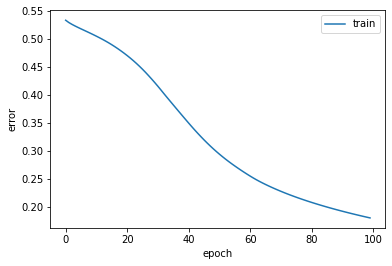

In [0]:
i_size = 5  # input vector size
h_size = [10]  # number of neurons in hidden states
o_size = 1  # output vector size

eeta = 0.5
batch_size = 9000
train_test(batch_size)
plot(plot_baseline=False,plot_test=False)

1b) Baseline error calculation


In [0]:
c = find_c()
y_baseline = baseline(c) 
print("baseline error: ",y_baseline)


baseline error:  0.5170269154706865


1c) Learning rate: 0.5

0 0.4802792025917292
1 0.47412752297845473
2 0.4561721628435753
3 0.4483409741183582
4 0.4579419812185443
5 0.4229772691148392
6 0.4161018687284588
7 0.4130230172074141
8 0.39508533694827874
9 0.39993770197252465
10 0.3946780348895397
11 0.369794749437163
12 0.38056632553291825
13 0.3567442706977338
14 0.3466708707036803
15 0.3599765522241877
16 0.34137398428465643
17 0.32864889819671084
18 0.3247474423679168
19 0.3170782118628834
20 0.31059843267325477
21 0.30972385995738144
22 0.31188654100797925
23 0.3418858549379125
24 0.3216253438205379
25 0.2831030603643215
26 0.2780085187194373
27 0.2750508746320036
28 0.27680695860130605
29 0.26435426967933795
30 0.26448815235929185
31 0.2593543966729868
32 0.2662749558166637
33 0.2519125701329831
34 0.24590604762989637
35 0.24325661364299142
36 0.24208536605226705
37 0.2465869629867516
38 0.23427967594130716
39 0.23004532983340228
40 0.23939912775368408
41 0.22541736073550464
42 0.2263657250417583
43 0.22322841685052755
44 0.25083713295321153


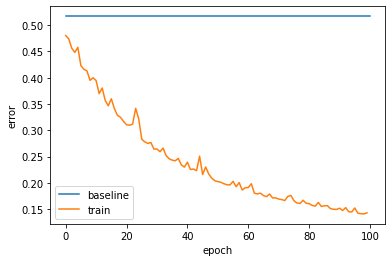

training set accuracy:  0.9503868353186786
test set accuracy:  0.9046904315196999


In [0]:
eeta = 0.5
batch_size = 100
train_test(batch_size,perf_type='error')
plot(plot_test=False,perf_type='error')

print("training set accuracy: ",accuracy('train'))
print("test set accuracy: ",accuracy('test'))

1d)

0 0.7876703917475132
1 0.7876703917475132
2 0.7876703917475132
3 0.7876703917475132
4 0.7876703917475132
5 0.7876703917475132
6 0.7876703917475132
7 0.7876703917475132
8 0.7876703917475132
9 0.7876703917475132
10 0.7876703917475132
11 0.7876703917475132
12 0.7876703917475132
13 0.7876703917475132
14 0.7876703917475132
15 0.7876703917475132
16 0.7876703917475132
17 0.7876703917475132
18 0.7876703917475132
19 0.7876703917475132
20 0.7876703917475132
21 0.7876703917475132
22 0.7876703917475132
23 0.7876703917475132
24 0.7876703917475132
25 0.7876703917475132
26 0.7876703917475132
27 0.7876703917475132
28 0.7876703917475132
29 0.7876703917475132
30 0.7876703917475132
31 0.7876703917475132
32 0.7876703917475132
33 0.7876703917475132
34 0.7876703917475132
35 0.7876703917475132
36 0.7876703917475132
37 0.7876703917475132
38 0.7876703917475132
39 0.7876703917475132
40 0.7876703917475132
41 0.7876703917475132
42 0.7876703917475132
43 0.7876703917475132
44 0.7876703917475132
45 0.787670391747513

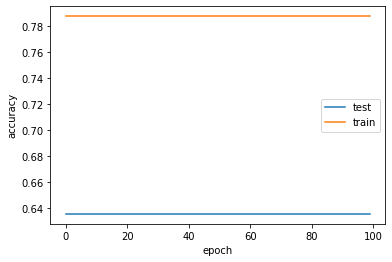

In [0]:
i_size = 5  # input vector size
h_size = [1]  # number of neurons in hidden states
o_size = 1  # output vector size

eeta = 0.9
batch_size = 100
train_test(batch_size,perf_type='accuracy')
plot(plot_baseline=False,perf_type='accuracy')

0 0.7876703917475132
1 0.7876703917475132
2 0.7876703917475132
3 0.7876703917475132
4 0.7876703917475132
5 0.7876703917475132
6 0.7876703917475132
7 0.7876703917475132
8 0.7876703917475132
9 0.7876703917475132
10 0.7876703917475132
11 0.7876703917475132
12 0.7876703917475132
13 0.7876703917475132
14 0.7876703917475132
15 0.7876703917475132
16 0.7876703917475132
17 0.7876703917475132
18 0.7876703917475132
19 0.7876703917475132
20 0.7876703917475132
21 0.7876703917475132
22 0.7876703917475132
23 0.7876703917475132
24 0.8189856318310205
25 0.7876703917475132
26 0.8054770968930369
27 0.8171435588849318
28 0.8149330713496254
29 0.8305292889598428
30 0.8281959965614638
31 0.8462483114331327
32 0.8333538008105121
33 0.8894756232346801
34 0.8859142822055753
35 0.8866511113840108
36 0.8860370870686479
37 0.8827213557656883
38 0.8814933071349625
39 0.9163698882475746
40 0.9236153751688567
41 0.9257030578410905
42 0.8811248925457448
43 0.90900159646322
44 0.9096156207785828
45 0.9104752548200908


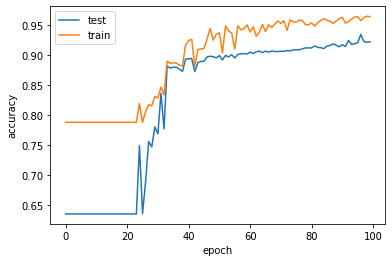

In [0]:
i_size = 5  # input vector size
h_size = [2]  # number of neurons in hidden states
o_size = 1  # output vector size

eeta = 0.9
batch_size = 100
train_test(batch_size,perf_type='accuracy')
plot(plot_baseline=False,perf_type='accuracy')

0 0.7876703917475132
1 0.7876703917475132
2 0.7876703917475132
3 0.7876703917475132
4 0.7876703917475132
5 0.7876703917475132
6 0.7876703917475132
7 0.7876703917475132
8 0.7876703917475132
9 0.7876703917475132
10 0.7876703917475132
11 0.7876703917475132
12 0.7876703917475132
13 0.7876703917475132
14 0.7876703917475132
15 0.7876703917475132
16 0.7876703917475132
17 0.7876703917475132
18 0.7876703917475132
19 0.7876703917475132
20 0.7876703917475132
21 0.7876703917475132
22 0.7876703917475132
23 0.7876703917475132
24 0.7876703917475132
25 0.7876703917475132
26 0.7876703917475132
27 0.7876703917475132
28 0.7876703917475132
29 0.7876703917475132
30 0.7876703917475132
31 0.7876703917475132
32 0.7876703917475132
33 0.7876703917475132
34 0.7876703917475132
35 0.7876703917475132
36 0.7876703917475132
37 0.7876703917475132
38 0.7876703917475132
39 0.7881616111998035
40 0.809529657374432
41 0.8156699005280609
42 0.8092840476482869
43 0.8218101436816898
44 0.8171435588849318
45 0.8183716075156576

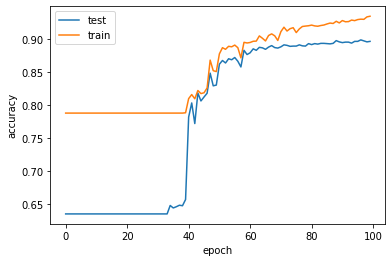

In [0]:
i_size = 5  # input vector size
h_size = [5]  # number of neurons in hidden states
o_size = 1  # output vector size

eeta = 0.5
batch_size = 100
train_test(batch_size,perf_type='accuracy')
plot(plot_baseline=False,perf_type='accuracy')

0 0.2123296082524868
1 0.2123296082524868
2 0.8923001350853493
3 0.7876703917475132
4 0.7876703917475132
5 0.7876703917475132
6 0.7876703917475132
7 0.7876703917475132
8 0.7876703917475132
9 0.7873019771582954
10 0.7876703917475132
11 0.7876703917475132
12 0.7922141716811986
13 0.7875475868844406
14 0.7876703917475132
15 0.7879160014736584
16 0.8129681935404642
17 0.8188628269679479
18 0.8344590445781653
19 0.8462483114331327
20 0.8392484342379958
21 0.8472307503377133
22 0.8281959965614638
23 0.8602480658234066
24 0.8320029473167138
25 0.8685987965123418
26 0.8738794056244628
27 0.8923001350853493
28 0.872651356993737
29 0.8952474517990913
30 0.8915633059069139
31 0.8797740390519465
32 0.8921773302222769
33 0.8888615989193172
34 0.9031069630357362
35 0.9038437922141717
36 0.9067911089279136
37 0.9088787916001474
38 0.9179663514675181
39 0.9120717180400344
40 0.9128085472184698
41 0.9151418396168488
42 0.9123173277661796
43 0.909247206189365
44 0.9167383028367924
45 0.9087559867370748


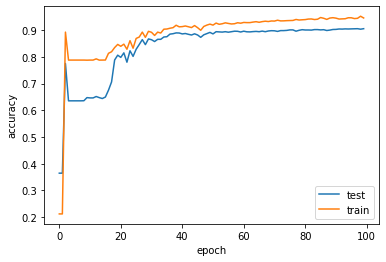

In [0]:
i_size = 5  # input vector size
h_size = [10]  # number of neurons in hidden states
o_size = 1  # output vector size

eeta = 0.5
batch_size = 100
train_test(batch_size,perf_type='accuracy')
plot(plot_baseline=False,perf_type='accuracy')

0 0.7876703917475132
1 0.7876703917475132
2 0.7876703917475132
3 0.7876703917475132
4 0.7876703917475132
5 0.7876703917475132
6 0.7876703917475132
7 0.7876703917475132
8 0.7876703917475132
9 0.7876703917475132
10 0.7876703917475132
11 0.7876703917475132
12 0.7876703917475132
13 0.7876703917475132
14 0.7876703917475132
15 0.7876703917475132
16 0.8035122190838757
17 0.8085472184698514
18 0.8522657497236891
19 0.8207048999140366
20 0.8561955053420115
21 0.8114945351835933
22 0.8195996561463834
23 0.8550902615743583
24 0.8452658725285521
25 0.8685987965123418
26 0.8620901387694953
27 0.8713005034999386
28 0.8640550165786565
29 0.8763355028859143
30 0.8558270907527938
31 0.8527569691759793
32 0.8797740390519465
33 0.88137050227189
34 0.8817389168611077
35 0.878177575832003
36 0.8853002578902125
37 0.8728969667198822
38 0.8882475746039543
39 0.8914405010438413
40 0.8825985509026157
41 0.8916861107699865
42 0.8916861107699865
43 0.8722829424045192
44 0.8899668426869703
45 0.8986859879651234
4

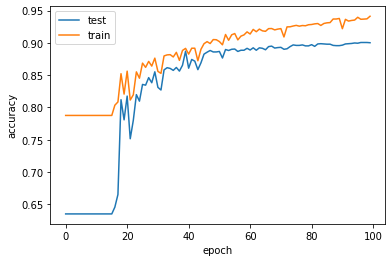

In [0]:
i_size = 5  # input vector size
h_size = [15]  # number of neurons in hidden states
o_size = 1  # output vector size

eeta = 0.5
batch_size = 100
train_test(batch_size,perf_type='accuracy')
plot(plot_baseline=False,perf_type='accuracy')

0 0.7876703917475132
1 0.7876703917475132
2 0.7876703917475132
3 0.7876703917475132
4 0.7876703917475132
5 0.7876703917475132
6 0.7876703917475132
7 0.7876703917475132
8 0.7876703917475132
9 0.7876703917475132
10 0.7876703917475132
11 0.7876703917475132
12 0.7876703917475132
13 0.7876703917475132
14 0.7876703917475132
15 0.7876703917475132
16 0.7876703917475132
17 0.7876703917475132
18 0.7876703917475132
19 0.7876703917475132
20 0.7876703917475132
21 0.8060911212083999
22 0.8081788038806337
23 0.8418273363625199
24 0.829301240329117
25 0.8393712391010684
26 0.816529534569569
27 0.8536166032174874
28 0.8386344099226329
29 0.85373940808056
30 0.8700724548692128
31 0.8699496500061402
32 0.871177698636866
33 0.8721601375414466
34 0.8655286749355274
35 0.867984772196979
36 0.8716689180891564
37 0.8682303819231242
38 0.8730197715829547
39 0.8762126980228417
40 0.9096156207785828
41 0.8974579393343977
42 0.8940194031683655
43 0.8888615989193172
44 0.8974579393343977
45 0.896475500429817
46 0.

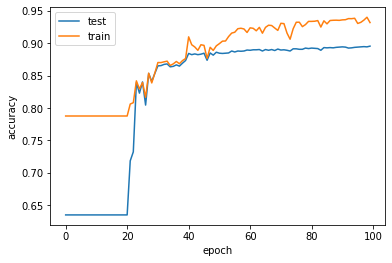

In [0]:
i_size = 5  # input vector size
h_size = [20]  # number of neurons in hidden states
o_size = 1  # output vector size

eeta = 0.5
batch_size = 100
train_test(batch_size,perf_type='accuracy')
plot(plot_baseline=False,perf_type='accuracy')

1e) Time representation used here: 

        time_sec = hours*60*60 + min*60 + sec
        time_rep = cos(2*pi*(time_sec/24*60*60))

0 0.23946948299152646
1 0.7876703917475132
2 0.7876703917475132
3 0.7876703917475132
4 0.7876703917475132
5 0.7876703917475132
6 0.7876703917475132
7 0.7876703917475132
8 0.7876703917475132
9 0.7876703917475132
10 0.7876703917475132
11 0.7876703917475132
12 0.7876703917475132
13 0.7876703917475132
14 0.7876703917475132
15 0.7876703917475132
16 0.7876703917475132
17 0.7876703917475132
18 0.7876703917475132
19 0.7876703917475132
20 0.7876703917475132
21 0.7876703917475132
22 0.7876703917475132
23 0.7876703917475132
24 0.7876703917475132
25 0.7876703917475132
26 0.7876703917475132
27 0.7876703917475132
28 0.7876703917475132
29 0.7876703917475132
30 0.7876703917475132
31 0.7876703917475132
32 0.7876703917475132
33 0.7876703917475132
34 0.7876703917475132
35 0.7876703917475132
36 0.7876703917475132
37 0.7876703917475132
38 0.7876703917475132
39 0.7876703917475132
40 0.7876703917475132
41 0.7876703917475132
42 0.7876703917475132
43 0.7876703917475132
44 0.7876703917475132
45 0.78767039174751

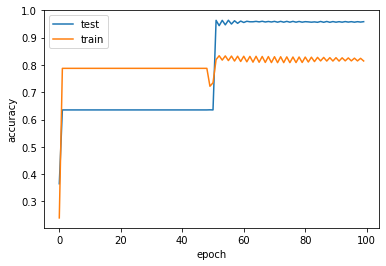

In [0]:
def accuracy_date(ds):
    line_count = 0
    total_error = 0
    if ds == 'test':
        dataset = 'datatest.txt'
    else: 
        dataset = 'datatraining.txt'

    with open(dataset) as csv_file:
        next(csv_file)
        csv_reader = csv.reader(csv_file, delimiter=',')
        dates = [row[1] for row in csv_reader]
        time = [(int(date[11:13]),int(date[14:16]),int(date[17:19])) for date in dates]
        norm_time = []
        for (h,m,s) in time:
            # print(h,m,s)
            t = (h*60*60 + m*60 + s)/86400
            norm_time.append(np.cos(2*np.pi*t))

    with open(dataset) as csv_test_file:
        next(csv_test_file)
        my_data = genfromtxt(csv_test_file, delimiter=',')
        csv_data = my_data[:,:]
        scaler = MinMaxScaler()
        norm_csv_data = scaler.fit_transform(my_data[:,2:7])
    for row in norm_csv_data:
        X = [[float(row[0])],[float(row[1])],[float(row[2])],[float(row[3])],[float(row[4])],[norm_time[line_count]]]
        d = int(csv_data[line_count][-1])
        forward(X)
        y = Y[-1][0][0]
        if (d == 1) and (y > 0.5):
            total_error += 1
        elif (d == 0) and (y <= 0.5):
            total_error += 1
        line_count += 1
    return total_error/line_count

def train_test_date(batch_size,perf_type='error'):
    createWB() 
    test_error_list.clear()
    train_error_list.clear()

    with open('datatraining.txt') as csv_file:
        next(csv_file)
        csv_reader = csv.reader(csv_file, delimiter=',')
        dates = [row[1] for row in csv_reader]
        time = [(int(date[11:13]),int(date[14:16]),int(date[17:19])) for date in dates]
        norm_time = []
        for (h,m,s) in time:
            # print(h,m,s)
            t = (h*60*60 + m*60 + s)/86400
            norm_time.append(np.cos(2*np.pi*t))

    with open('datatraining.txt') as csv_train_file:
        next(csv_train_file)
        # to normalize data
        my_data = genfromtxt(csv_train_file, delimiter=',')
        csv_data = my_data[:,:]
        scaler = MinMaxScaler()
        norm_csv_data = scaler.fit_transform(my_data[:,2:7])

    for epoch in range(epoch_count):
        line_count = 0
        for row in norm_csv_data[:batch_size]:
        # for row in norm_csv_data:
            X = [[float(row[0])],[float(row[1])],[float(row[2])],[float(row[3])],[float(row[4])],[norm_time[line_count]]]
            d = csv_data[line_count][-1]
            forward(X)
            backward(d)
            line_count += 1
        update(line_count)
        clear()

        error = accuracy_date('test')
        test_error_list.append(error)
  
        error = accuracy_date('train')
        train_error_list.append(error)

        print(epoch,error) 

i_size = 6  # input vector size
h_size = [5]  # number of neurons in hidden states
o_size = 1  # output vector size

eeta = 0.9
batch_size = 100

train_test_date(batch_size)
plot(plot_baseline=False,perf_type='accuracy')